In [1]:
from IPython.display import Markdown, display
display(Markdown("header.md"))

header.md

## Session 02 - Univariate statistics

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb

# Ignore warnings from seaborn
import warnings

warnings.filterwarnings("ignore")
from pprint import pprint
# import jupyter_black

# jupyter_black.load()

## Qualitative data
To explore qualitative data, we will compute summary tables.

### [easy] summary table (in percentage)

Write a function that computes a summary table (in percentage) of categorical data (passed as an iterable)
The output should be a dictionary with keys being all possible values in the data, and values being the frequency (in percent). 
Test your function using the `salary.csv` dataset on categorical columns and on the `romeo_juliet.txt`file to analyze words/letter frequencies.

In [3]:
def msds_summary_table(data):
    """
    Computes a summary table of 1D qualitative data
    """
    freqs = dict()
    for value in data:
        freqs[value] = freqs.get(value, 0) + 1
    for k, v in freqs.items():
        freqs[k] = freqs[k] / len(data) * 100
    return freqs


def test_msds_summary_table():
    test_data1 = ["A", "A", "B", "C"]
    summary_test_data1 = msds_summary_table(test_data1)
    assert len(summary_test_data1) == 3, f"{len(summary_test_data1)} != 3"
    assert (
        sum(summary_test_data1.values()) == 100
    ), f"{sum(summary_test_data1.values())} != 100"
    assert summary_test_data1["A"] == 50, f"{summary_test_data1['A']} != 50"

    with open(r"data/romeo_juliet.txt") as fd:
        txt_data = fd.read()
        summary_words = msds_summary_table(txt_data.split())
        letters = "".join(
            [a.upper().strip().replace(" ", "") for a in txt_data.split()]
        )
        summary_letters = msds_summary_table(letters)
        assert len(summary_words) == 6338, f"{len(summary_words)} != 6338"
        assert len(summary_letters) == 37, f"{len(summary_letters)} != 37"
        assert (
            summary_letters["E"] - 11.394633426391877
        ) < 1e-5, f"{summary_letters['E']} != 10.9736362157"

    salary_data = pd.read_csv(r"data/salary.csv")
    summary_salary_data = msds_summary_table(salary_data.Gender)
    assert len(summary_salary_data) == 3
    assert sum(summary_salary_data.values()) == 100
    assert abs(summary_salary_data["Male"] - 51.73333333333) < 1e-5


test_msds_summary_table()

### [moderate] summary table (counts and percentages)

Write a function that computes both the frequency in percentage and number of occurence, it should output a dict of dict like this on ['A','A','B','C']:

`{'A': {'cpt': 2, 'freq': 50.0}, 'B': {'cpt': 1, 'freq': 25.0}, 'C': {'cpt': 1, 'freq': 25.0}}`


In [4]:
def msds_summary_table_full(data):
    freqs = dict()
    for value in data:
        if value in freqs:
            freqs[value]["cpt"] += 1
        else:
            freqs[value] = {"cpt": 1, "freq": 0}
    for k, v in freqs.items():
        freqs[k]["freq"] = freqs[k]["cpt"] / len(data) * 100
    return freqs


def test_msds_summary_table_full():
    test_data1 = ["A", "A", "B", "C"]
    summary_test_data1 = msds_summary_table_full(test_data1)
    assert len(summary_test_data1) == 3
    assert sum([x["freq"] for x in summary_test_data1.values()]) == 100
    assert summary_test_data1["A"]["freq"] == 50
    assert summary_test_data1["A"]["cpt"] == 2

    with open("data/romeo_juliet.txt") as fd:
        txt_data = fd.read()
        summary_words = msds_summary_table_full(txt_data.split())
        letters = "".join(
            [a.upper().strip().replace(" ", "") for a in txt_data.split()]
        )
        summary_letters = msds_summary_table_full(letters)
        assert len(summary_words) == 6338, f"{len(summary_words)} != 6338"
        assert len(summary_letters) == 37, f"{len(summary_letters)} != 37"
        assert abs(summary_letters["E"]["freq"] - 11.394633426391877) < 1e-5
        assert summary_letters["E"]["cpt"] == 12816

    salary_data = pd.read_csv("data/salary.csv")
    summary_salary_data = msds_summary_table_full(salary_data.Gender)
    assert len(summary_salary_data) == 3
    assert sum([x["freq"] for x in summary_salary_data.values()]) == 100
    assert abs(summary_salary_data["Male"]["freq"] - 51.73333333333) < 1e-5
    assert summary_salary_data["Male"]["cpt"] == 194


test_msds_summary_table_full()

### [easy] visualizing summary tables

Write a function that plots a summary table, with appropriate axis values and labels.

*Use `matplotlib` as plotting engine.*

Test your implementation on letter frequencies (Romeo and Juliet) and qualitative variables from `salary.csv`

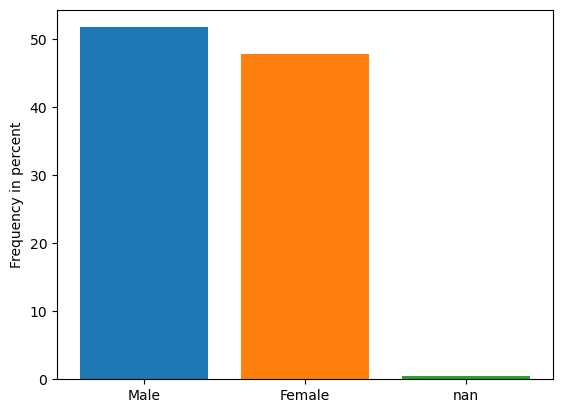

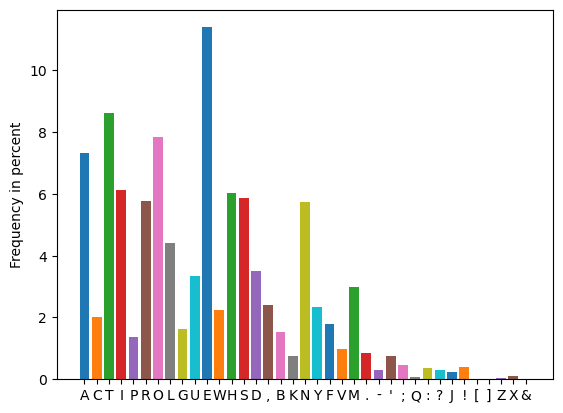

In [5]:
def msds_plot_summary_table(table, freqs=True):
    x = list([str(x) for x in table.keys()])
    if freqs:
        y = [x["freq"] for x in table.values()]
        yLabel = "Frequency in percent"
    else:
        y = [x["cpt"] for x in table.values()]
        yLabel = "Count"
    cmap = plt.cm.tab10
    colors = cmap(np.arange(len(table)) % cmap.N)
    fig, ax = plt.subplots()
    ax.bar(x, y, color=colors)
    ax.set_ylabel(yLabel)


def test_msds_plot_summary_table():
    salary_data = pd.read_csv("data/salary.csv")
    summary_salary_data = msds_summary_table_full(salary_data.Gender)
    msds_plot_summary_table(summary_salary_data)

    with open("data/romeo_juliet.txt") as fd:
        txt_data = fd.read()
        letters = "".join(
            [a.upper().strip().replace(" ", "") for a in txt_data.split()]
        )
        summary_letters = msds_summary_table_full(letters)
        msds_plot_summary_table(summary_letters)


test_msds_plot_summary_table()

### [easy] visualizing summary tables (sorted)

Same as before, but now sort data by descending frequency order

Test your implementation on letter frequencies (Romeo and Juliet) and qualitative variables from `salary.csv`

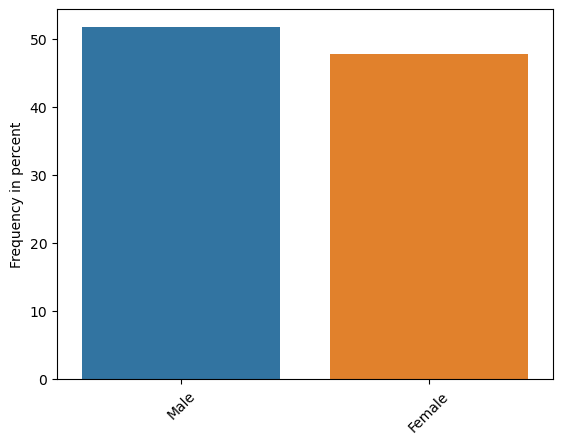

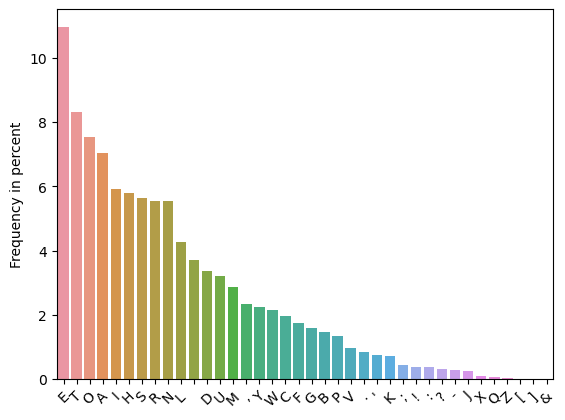

In [6]:
def msds_plot_summary_table_sorted(table, freqs=True, limit=100):
    table = dict(sorted(table.items(), key=lambda item: item[1]["freq"], reverse=True))
    x = list(table.keys())
    if freqs:
        y = [x["freq"] for x in table.values()]
        yLabel = "Frequency in percent"
    else:
        y = [x["cpt"] for x in table.values()]
        yLabel = "Count"

    plt.figure()
    sb.barplot(x=x[:limit], y=y[:limit]).set(ylabel=yLabel)
    plt.xticks(rotation=45)


def test_msds_plot_summary_table_sorted():
    salary_data = pd.read_csv("data/salary.csv")
    summary_salary_data = msds_summary_table_full(salary_data.Gender)
    msds_plot_summary_table_sorted(summary_salary_data)

    with open("data/romeo_juliet.txt") as fd:
        txt_data = fd.read()
        summary_letters = msds_summary_table_full(txt_data.upper().replace(" ", ""))
        msds_plot_summary_table_sorted(summary_letters)


test_msds_plot_summary_table_sorted()

### [moderate] visualizing summary tables (Pareto-style)

Add cumulative relative frequency (as line chart) on top of your bar chart to build a *Pareto* chart.

Test your implementation on letter frequencies (Romeo and Juliet) and qualitative variables from `salary.csv`

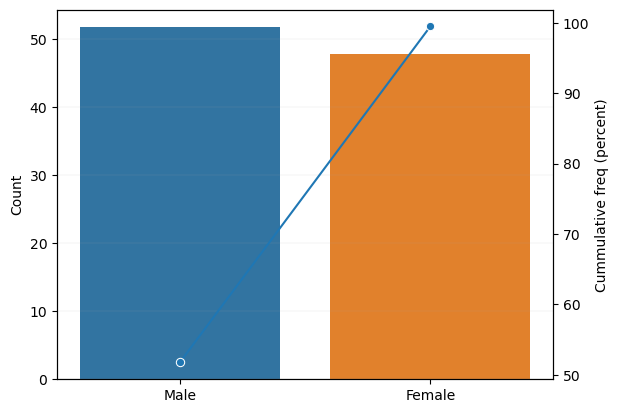

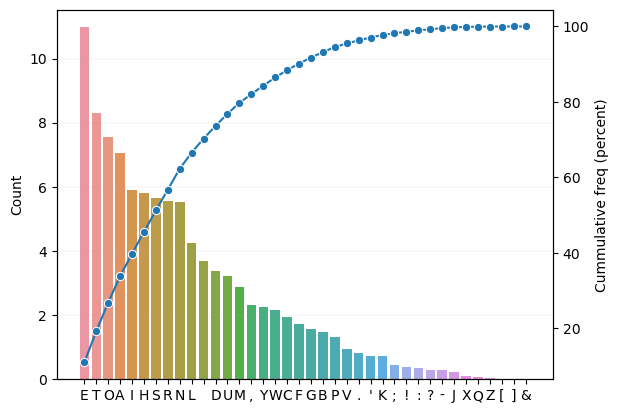

In [7]:
def msds_plot_summary_table_pareto(table):
    table = dict(sorted(table.items(), key=lambda item: item[1]["freq"], reverse=True))
    x = list(table.keys())
    y = [x["freq"] for x in table.values()]
    yLabel = "Counr"
    cum_y = np.cumsum(y)
    plt.figure()
    plt.grid(color="#aaa", linestyle="-", linewidth=0.1)
    sb.barplot(x=x, y=y).set(ylabel="Count")
    ax2 = plt.twinx()
    sb.lineplot(x=x, y=cum_y, marker="o").set(ylabel="Cummulative freq (percent)")


def test_msds_plot_summary_table_sorted():
    salary_data = pd.read_csv("data/salary.csv")
    summary_salary_data = msds_summary_table_full(salary_data.Gender)
    msds_plot_summary_table_pareto(summary_salary_data)

    with open("data/romeo_juliet.txt") as fd:
        txt_data = fd.read()
        summary_letters = msds_summary_table_full(txt_data.upper().replace(" ", ""))
        msds_plot_summary_table_pareto(summary_letters)


test_msds_plot_summary_table_sorted()

## Quantitative data

To explore quantitative data, we will compute histograms.

### [easy] histogram computation

Write a function that computes histogram for a given quantitative dataset (iterable).
It should take two parameters:
 - the data (iterable with numerical values)
 - the number of bins $N$

It should return two lists:
 - a list of classes mid-points (X axis)
 - a list of relative frequency (in percent) (Y axis)

Test your implementation on quantitative variables of `salary.csv` and `weights_heights.csv` datasets.

In [4]:
def msds_histogram(data, N=5):
    data_min = min(data)
    data_max = max(data)
    rg = data_max - data_min
    bin_indices = [
        int(np.floor(N * (x - data_min) / rg))
        for x in data
        if x is not None and not np.isnan(x)
    ]
    bins_width = rg / N
    bins_midpoints = [data_min + bins_width * (i - 0.5) for i in range(1, N + 1)]
    bins_data = np.zeros(N).astype("int32")
    for i in bin_indices:
        bins_data[min(i, N - 1)] += 1
    return bins_data, bins_midpoints

salary_data = pd.read_csv("salary.csv")
hist_age, mp = msds_histogram(salary_data.Age, 10)
hist_age

array([ 6, 29, 59, 53, 54, 40, 35, 48, 32, 17])

In [5]:
mp

[24.5, 27.5, 30.5, 33.5, 36.5, 39.5, 42.5, 45.5, 48.5, 51.5]

In [2]:
import pandas as pd


def msds_histogram(data, N=5):
    data_min = min(data)
    data_max = max(data)
    rg = data_max - data_min
    bin_indices = [
        int(np.floor(N * (x - data_min) / rg))
        for x in data
        if x is not None and not np.isnan(x)
    ]
    bins_width = rg / N
    bins_midpoints = [data_min + bins_width * (i - 0.5) for i in range(1, N + 1)]
    bins_data = np.zeros(N).astype("int32")
    for i in bin_indices:
        bins_data[min(i, N - 1)] += 1
    return bins_data, bins_midpoints


def test_msds_histogram():
    salary_data = pd.read_csv("salary.csv")
    hist_age, mp = msds_histogram(salary_data.Age, 10)
    assert hist_age[0] == 6
    assert hist_age[-1] == 17


test_msds_histogram()

### [moderate] histogram computation (improved)

Write a function that computes histogram for a given quantitative dataset (iterable).
It should take two parameters:
 - the data (iterable with numerical values)
 - the number of bins $N$

It should return a list of dict with the following attributes:
 - `lower`: class lower bound 
 - `upper`: class upper bound 
 - `mid`: class midpoint
 - `count`: number of values in this class
 - `freq`: relative frequency (in percent)

[advanced] instead of returning a dict, define a class for handling histogram data

Test your implementation on quantitative variables of `salary.csv` and `weights_heights.csv` datasets.

In [9]:
def msds_histogram2(data, N=5):
    data_min = min(data)
    data_max = max(data)
    rg = data_max - data_min
    bin_indices = [
        int(np.floor(N * (x - data_min) / rg))
        for x in data
        if x is not None and not np.isnan(x)
    ]
    n = len(bin_indices)
    bins_width = rg / N
    bins_lower = [data_min + bins_width * (i - 1) for i in range(1, N + 1)]
    bins_mid = [data_min + bins_width * (i - 0.5) for i in range(1, N + 1)]
    bins_upper = [data_min + bins_width * (i) for i in range(1, N + 1)]
    bins_data = np.zeros(N).astype("int32")
    for i in bin_indices:
        bins_data[min(i, N - 1)] += 1

    ds = []
    for i in range(N):
        ds.append(
            {
                "lower": bins_lower[i],
                "upper": bins_upper[i],
                "mid": bins_mid[i],
                "count": bins_data[i],
                "freq": bins_data[i] / n * 100,
            }
        )
    return ds


def test_msds_histogram2():
    salary_data = pd.read_csv("data/salary.csv")
    hist_age = msds_histogram2(salary_data.Age, 10)
    assert hist_age[0]["lower"] == 23
    assert hist_age[0]["upper"] == 26
    assert (
        hist_age[0]["count"]
        == salary_data.loc[(salary_data.Age < 26) & (salary_data.Age >= 23)].Age.count()
    )
    assert abs(hist_age[0]["freq"] - 1.6085790884718498) < 1e-5
    assert (
        sum([x["freq"] for x in hist_age]) == 100
    ), f"{sum([x['freq'] for x in hist_age])}"


test_msds_histogram2()

### [easy] visualizing histogram data

Write a function that plots a frequency/number of occurrence dataset, with appropriate axis values and labels.

Test your implementation on quantitative variables of `salary.csv` and `weights_heights.csv` datasets.

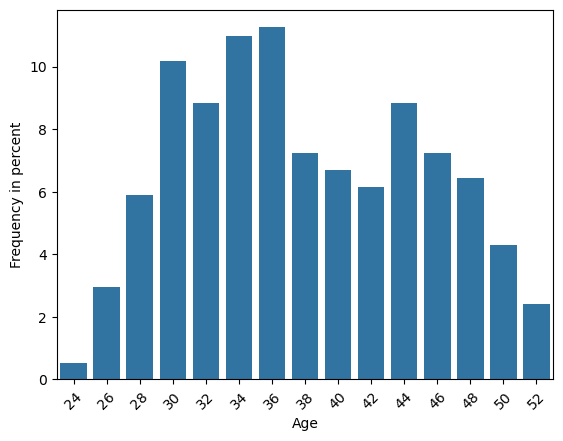

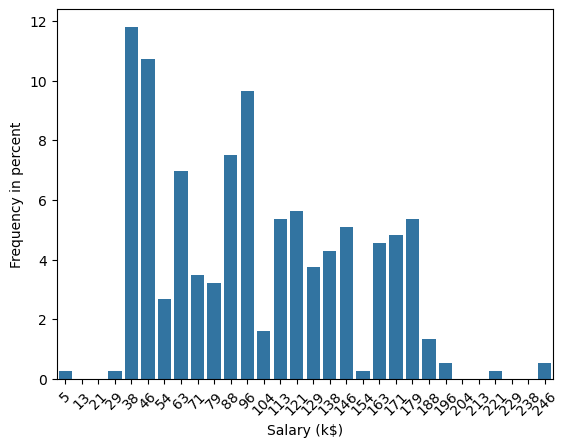

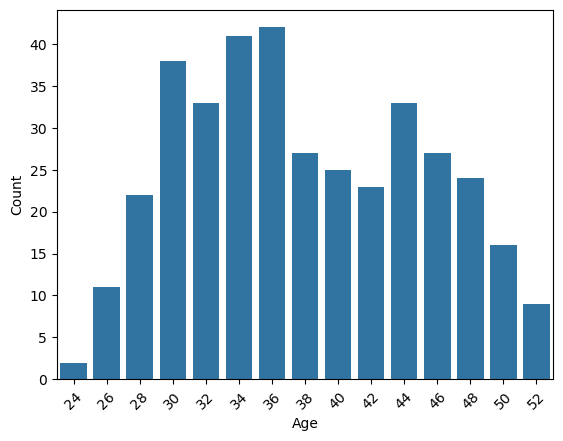

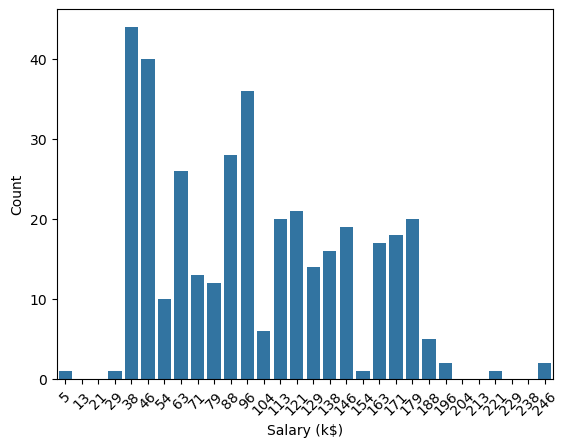

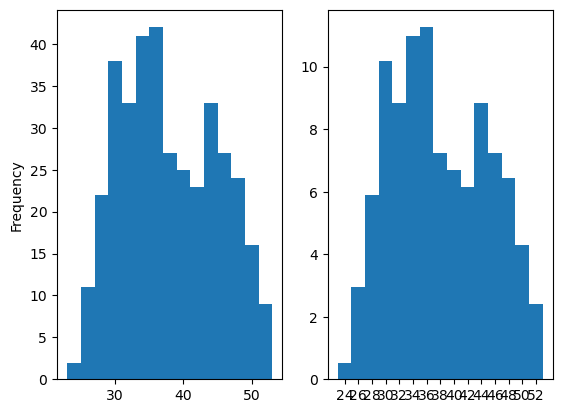

In [10]:
def msds_plot_histogram(hist_data, freqs=True, title=None):
    x = ["{:.0f}".format(a["mid"]) for a in hist_data]
    if freqs:
        y = [x["freq"] for x in hist_data]
        yLabel = "Frequency in percent"
    else:
        y = [x["count"] for x in hist_data]
        yLabel = "Count"

    plt.figure()
    sb.barplot(x=x, y=y, color=sb.color_palette()[0]).set(
        ylabel=yLabel,
        xlabel=title,
    )
    if len(hist_data) > 10:
        plt.xticks(rotation=45)


def test_msds_plot_histogram():
    salary_data = pd.read_csv("data/salary.csv")
    age_hist = msds_histogram2(salary_data.Age, 15)
    msds_plot_histogram(age_hist, title="Age")
    msds_plot_histogram(
        msds_histogram2(salary_data.Salary / 1000, 30), title="Salary (k$)"
    )
    msds_plot_histogram(age_hist, title="Age", freqs=False)
    msds_plot_histogram(
        msds_histogram2(salary_data.Salary / 1000, 30), freqs=False, title="Salary (k$)"
    )
    fig, (ax1, ax2) = plt.subplots(1, 2)
    salary_data.Age.plot.hist(bins=15, ax=ax1)
    y = [x["freq"] for x in age_hist]
    x = ["{:.0f}".format(a["mid"]) for a in age_hist]
    ax2.bar(x, y, width=1)


test_msds_plot_histogram()

### [moderate] cummulative histograms

Write a function that computes cummulative frequency distribution given an histogram data.
It should take two parameters:
 - the data (iterable with numerical values)
 - the number of bins $N$

It should return two lists:
 - a list of classes mid-points (X axis)
 - a list of cumulative relative frequency (in percent) (Y axis)


In [11]:
def msds_cum_histogram(data, N=5):
    data_min = min(data)
    data_max = max(data)
    rg = data_max - data_min
    bin_indices = [
        int(np.floor(N * (x - data_min) / rg))
        for x in data
        if x is not None and not np.isnan(x)
    ]
    n = len(bin_indices)
    bins_width = rg / N
    bins_lower = [data_min + bins_width * (i - 1) for i in range(1, N + 1)]
    bins_mid = [data_min + bins_width * (i - 0.5) for i in range(1, N + 1)]
    bins_upper = [data_min + bins_width * (i) for i in range(1, N + 1)]
    bins_data = np.zeros(N).astype("int32")
    for i in bin_indices:
        bins_data[min(i, N - 1)] += 1
    ds = []
    cum_data = np.cumsum(bins_data)
    for i in range(N):
        ds.append(
            {
                "lower": bins_lower[i],
                "upper": bins_upper[i],
                "mid": bins_mid[i],
                "count": bins_data[i],
                "freq": bins_data[i] / n * 100,
                "cum_freq": cum_data[i] / n * 100,
            }
        )
    return ds


def test_msds_cum_histogram():
    salary_data = pd.read_csv("data/salary.csv")
    for NB in [5, 10, 15, 20]:
        hist_age = msds_cum_histogram(salary_data.Age)
        assert hist_age[-1]["cum_freq"] == 100


test_msds_cum_histogram()

### [moderate] visualizing histogram and cumulative frequencies (Pareto style)

Write a function that plots a Pareto charts on some data, with histogram as bar chart and cumulative frequency as a line chart.

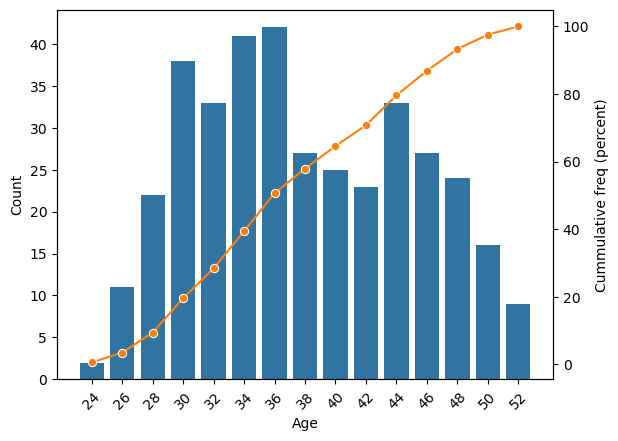

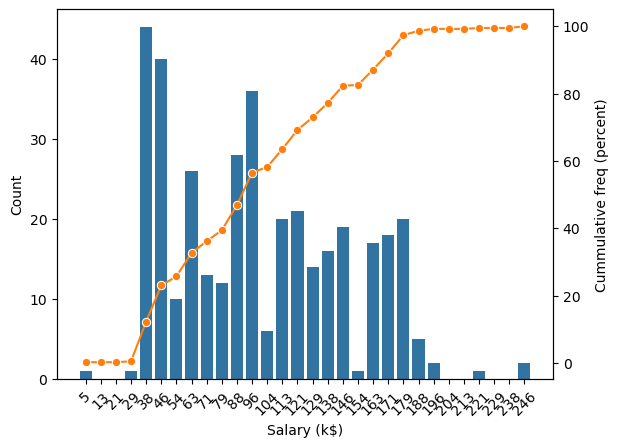

In [12]:
def msds_plot_histogram_pareto(hist_data, title=None):
    x = ["{:.0f}".format(a["mid"]) for a in hist_data]
    y = [x["count"] for x in hist_data]
    cum_y = [x["cum_freq"] for x in hist_data]
    yLabel = "Count"

    plt.figure()
    sb.barplot(x=x, y=y, color=sb.color_palette()[0]).set(
        ylabel=yLabel,
        xlabel=title,
    )
    if len(hist_data) > 10:
        plt.xticks(rotation=45)
    ax2 = plt.twinx()
    sb.lineplot(x=x, y=cum_y, marker="o", color=sb.color_palette()[1]).set(
        ylabel="Cummulative freq (percent)"
    )


def test_msds_plot_histogram_pareto():
    salary_data = pd.read_csv("data/salary.csv")
    msds_plot_histogram_pareto(msds_cum_histogram(salary_data.Age, 15), title="Age")
    msds_plot_histogram_pareto(
        msds_cum_histogram(salary_data.Salary / 1000, 30), title="Salary (k$)"
    )


test_msds_plot_histogram_pareto()